<a href="https://colab.research.google.com/github/subratpp0/subratpp0/blob/main/arc_ga_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARC Task1 with Genetic Algorithm**

In [180]:
import numpy as np
import pandas as pd
import itertools
import random

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors

In [181]:
# Download dataset to google colab
!git clone https://github.com/fchollet/ARC.git

fatal: destination path 'ARC' already exists and is not an empty directory.


In [182]:
data_path = Path('ARC/data')
training_path = data_path / 'training'
test_path = data_path / 'evaluation'
training_tasks = sorted(os.listdir(training_path)) # retruns list of name of json file in sorted order

In [183]:
task1 = training_path / 'ed36ccf7.json' # example easy task
task1

PosixPath('ARC/data/training/ed36ccf7.json')

## Visualization of Task

In [184]:
#
# This code is used to display a task
# It accepts 11 colors, one more than the images, in case we want to use it
#

cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25','#4a4d4a'])
norm = colors.Normalize(vmin=0, vmax=10)
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25','#4a4d4a'])
    norm = colors.Normalize(vmin=0, vmax=10)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)
    

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()        
        
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
    if num_test==1: 
        plot_one(axs[0],0,'test','input')
        plot_one(axs[1],0,'test','output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],i,'test','input')
            plot_one(axs[1,i],i,'test','output')  
    plt.tight_layout()
    plt.show() 

    
# Display each output of the function
def show_image_list(images):
    """ Show each image contained in a list. """
    p = plt.figure(figsize=[17,5]).subplots(1, len(images))
    
    if len(images) > 1:
        for i, image in enumerate(images):
            p[i].imshow(image, cmap=cmap, norm=norm)
    elif len(images) == 1:
        p.imshow(images[0], cmap=cmap, norm=norm)

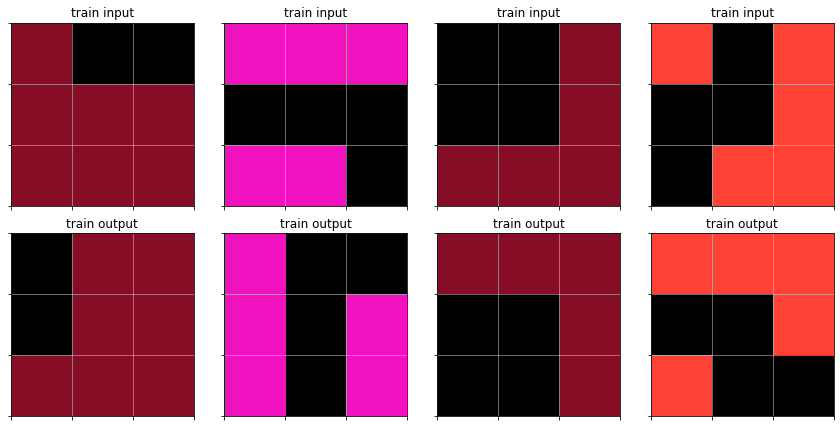

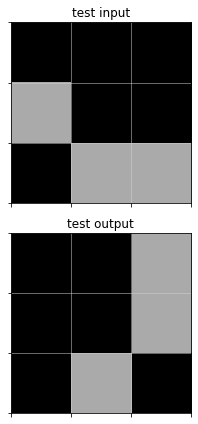

In [185]:
# Load simple task
task_file = str(task1)
with open(task_file, 'r') as f:
    task = json.load(f) #returns dictionary { 'test':[ {'input':[], 'output':[]} ], 'train':[ {'input':[], 'output':[]}, {}] }
    plot_task(task)

# Functions List

In [186]:
#Sample image for testing function
img = np.array(task['train'][0]['input'])

In [187]:
def plot_apply_function(imgs: [np.ndarray], function_name):
    num_imgs = len(imgs)
    mod_imgs = function_name(imgs)
    fig, axs = plt.subplots(1, num_imgs)
    if num_imgs == 1:
        axs.imshow(mod_imgs[0], cmap=cmap, norm=norm)
    else:
      for i in range(num_imgs):     
          axs[i].imshow(mod_imgs[i], cmap=cmap, norm=norm)
        
    plt.tight_layout()
    plt.show()        


# Following functions are of type [ndarray] -> [ndarray]
#1
def identity( imgs: [np.ndarray] ) -> [np.ndarray]:
    '''Identical list of images'''
    return imgs
#2
def rotate_90( imgs: [np.ndarray] ) -> [np.ndarray]:
    '''Rotate list of images by 90 degrees anti-clockwise'''
    return [ np.rot90(img) for img in imgs ]

#3
def flip_ud(imgs: [np.ndarray]) -> [np.ndarray]:
    '''Flip up-down'''
    return [np.flipud(img) for img in imgs] 

#4
def flip_lr(imgs: [np.ndarray]) -> [np.ndarray]:
    '''Flip left-right'''
    return [np.fliplr(img) for img in imgs] 

#5
def rollonce_lr(imgs: [np.ndarray]) -> [np.ndarray]:
    '''Roll the axis once left to right'''
    return [ np.roll(img, 1, 1) for img in imgs ]

#6
def rollonce_ud(imgs: [np.ndarray]) -> [np.ndarray]:
    '''Roll the axis once left to right'''
    return [ np.roll(img, 1, 0) for img in imgs ]
#7
# def rollaxis

#8
#def group_colours

#9

# def hstack(x: np.ndarray, y: np.ndarray) -> np.ndarray:
#   return np.hstack((x,y))

# def where(x: np.array, p: Color, q: Color) -> np.ndarray:
#   return np.where(x==p.value, q.value, x)

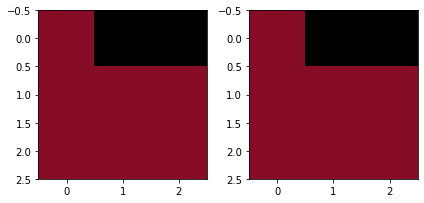

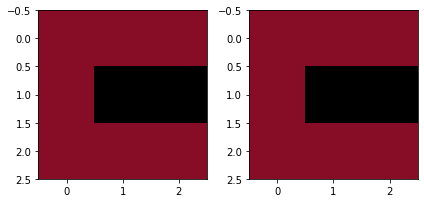

In [188]:
plot_apply_function([img, img], identity)
plot_apply_function([img, img], rollonce_ud)

# Expression Tree: Test

In [189]:
!pip install deap

In [190]:
from deap.gp import PrimitiveSetTyped

In [191]:
pset = PrimitiveSetTyped("main", [list], list) # input and output of the expression is [np.ndarray]

#add functions in the expression
pset.addPrimitive(identity, [list], list)
pset.addPrimitive(rotate_90, [list], list )
pset.addPrimitive(flip_ud, [list], list)
pset.addPrimitive(flip_lr, [list], list)
pset.addPrimitive(rollonce_lr, [list], list)
pset.addPrimitive(rollonce_ud, [list], list)


In [192]:
pset.renameArguments(ARG0="x")

In [193]:
from deap.gp import genFull, PrimitiveTree
expr = genFull(pset, min_= 1, max_= 3)
tree = PrimitiveTree(expr)

In [194]:
str(tree)

'rotate_90(x)'

In [195]:
import deap
function = deap.gp.compile(tree, pset)

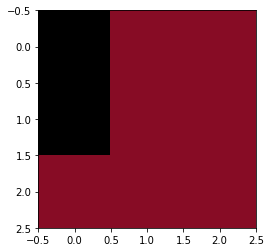

In [196]:
plt.imshow(function([img])[0], cmap=cmap, norm=norm)

In [197]:
expr

[<deap.gp.Primitive at 0x7f387dfe5a10>, <deap.gp.Terminal at 0x7f387e035b40>]

# Genetic Algo

In [242]:
from deap import base
from deap import gp
from deap import creator
from deap import tools
from deap import algorithms


import seaborn as sns

# problem constants:

# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax, pset=pset)



/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [243]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("compile", gp.compile, pset=pset)

## Draw Sample Tree

In [231]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [244]:
#draw tree
expr = toolbox.individualCreator()
nodes, edges, labels = gp.graph(expr)

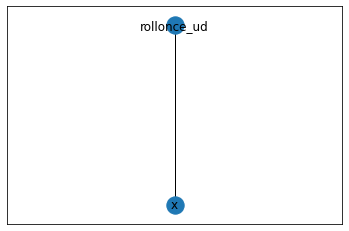

In [245]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

## Evaluate Individual Expression and Compute Fitness

In [246]:
#input and output images
imgs_in = []
imgs_out = []
for sample in task['train']:
    imgs_in += [ np.array(sample['input']) ]
    imgs_out += [ np.array(sample['output']) ]

In [247]:
# fitness calculation:
# compute the number of '1's in the individual
def evalFitness(individual):
    func = toolbox.compile(expr=individual)
    imgs_result = func(imgs_in)

    score = 0
    for i, im in enumerate(imgs_result):
        if (im == imgs_out[i]).all(): # compare result image with output image
            score +=1
        elif im.shape == imgs_out[i].shape: # compute fraction of similarity
            score += np.sum(im == imgs_out[i])/(np.prod(im.shape)) # matching_pixel_count / total_number_of_pixels

        else:
          score = 0
    
    return score/len(imgs_in), #take average of score #return a tuple

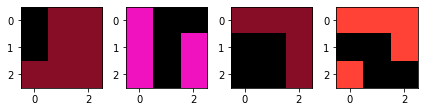

In [237]:
plot_apply_function(imgs_out, identity)

## Run GA

In [249]:
# Fitness function
toolbox.register("evaluate", evalFitness)
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)
# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)
#Mutation:
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [253]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(10)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

gen	nevals	max	avg     
0  	100   	1  	0.636667
1  	88    	1  	0.711667
2  	92    	1  	0.771667
3  	90    	1  	0.827778
4  	86    	1  	0.922778
5  	92    	1  	0.966667
6  	98    	1  	0.953889
7  	88    	1  	0.977222
8  	92    	1  	0.99    
9  	91    	1  	0.977778
10 	86    	1  	0.967778
11 	97    	1  	0.959444
12 	90    	1  	0.965556
13 	91    	1  	0.962222
14 	96    	1  	0.974444
15 	89    	1  	0.959444
16 	80    	1  	0.986111
17 	98    	1  	0.981111
18 	85    	1  	0.96    
19 	96    	1  	0.962778
20 	81    	1  	0.983333
21 	91    	1  	0.943333
22 	90    	1  	0.976667
23 	91    	1  	0.963333
24 	98    	1  	0.975   
25 	84    	1  	0.969444
26 	95    	1  	0.982222
27 	93    	1  	0.952222
28 	93    	1  	0.962222
29 	92    	1  	0.962222
30 	90    	1  	0.971667
31 	95    	1  	0.962222
32 	91    	1  	0.977778
33 	92    	1  	0.98    
34 	95    	1  	0.991667
35 	97    	1  	0.944444
36 	93    	1  	0.961111
37 	92    	1  	0.99    
38 	93    	1  	0.96    
39 	92    	1  	0.958333
40 	95    	1  	0

Hall of Fame Individuals = 
rotate_90(flip_lr(flip_lr(x)))
rotate_90(identity(identity(x)))
identity(rotate_90(x))
rotate_90(flip_ud(flip_ud(x)))
rotate_90(x)
identity(identity(rotate_90(x)))
rotate_90(identity(x))
flip_ud(flip_ud(flip_ud(x)))
rotate_90(rotate_90(flip_lr(x)))
flip_ud(identity(identity(x)))
flip_ud(identity(x))
rollonce_lr(rotate_90(flip_ud(x)))
flip_lr(flip_ud(flip_lr(x)))
rollonce_ud(flip_ud(rollonce_ud(x)))
flip_ud(x)
identity(flip_ud(x))
rotate_90(rollonce_lr(flip_lr(x)))
flip_ud(identity(rotate_90(x)))
flip_ud(rotate_90(x))
flip_ud(rotate_90(identity(x)))
Best Ever Individual =  rotate_90(flip_lr(flip_lr(x)))


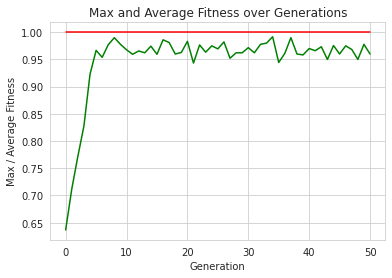

In [254]:
# print Hall of Fame info:
print("Hall of Fame Individuals = ", *hof.items, sep="\n")
print("Best Ever Individual = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')

plt.show()

# Best Solution

In [255]:
hof.items[0]

In [256]:
func = toolbox.compile(expr=hof.items[0])
final_result = func(imgs_in)

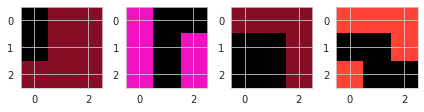

In [257]:
plot_apply_function(imgs_out, identity) # Output of training data

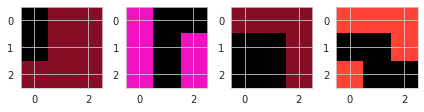

In [258]:
plot_apply_function(final_result, identity) #Final Result from Genetic Algo

# Test

In [259]:
test_in = []
test_out = []
for sample in task['test']:
    test_in += [ np.array(sample['input']) ]
    test_out += [ np.array(sample['output']) ]

In [260]:
test_in

[array([[0, 0, 0],
        [5, 0, 0],
        [0, 5, 5]])]

In [261]:
test_result = func(test_in)

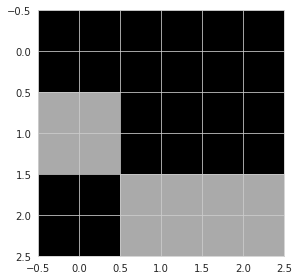

In [262]:
plot_apply_function(test_in, identity) # Input test Data

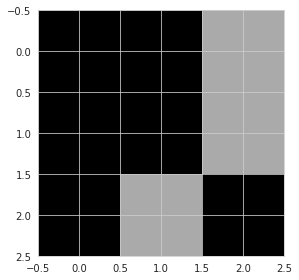

In [263]:
plot_apply_function(test_out, identity) # Actual test result

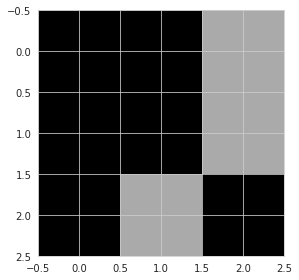

In [264]:
plot_apply_function(test_result, identity) # Test result from GA Solution